# Variational AutoEncoder (VAE)

$\def\abs#1{\left\lvert #1 \right\rvert} \def\Set#1{\left\{ #1 \right\}} \def\mc#1{\mathcal{#1}} \def\M#1{\boldsymbol{#1}} \def\R#1{\mathsf{#1}} \def\RM#1{\boldsymbol{\mathsf{#1}}} \def\op#1{\operatorname{#1}} \def\E{\op{E}} \def\d{\mathrm{\mathstrut d}}$

To do:
- ~~explanation for the trainning and ploting~~
- the analysis of the two term in the ELBO and relation with Information theory
- ~~infoVAE~~
- Examples showing why InfoVAE
- add references in relevant part

Notations:  
*When substitue, remember skip the code*
- ~~substitue Z by \R{Z} and similar for X, J . but need skip \mc{X}, \mc{Z}. *DO NOT DIRECTLY REPLACE IN VS CODE, BETTER DO THIS WITH JSON VIEW* 
Several place involve \R{z} to indicate an element of Z as random variable, which has already used \R{z}, same for \R{\hat{z}}~~
- ~~substitue Encoder by *Encoder*, and similar for decoder~~

To improve:
- why directly sampling posterior is intractable
- reparameterization trick, seems have relationship with importance sampling
- whether also use sampling for x_hat in the experiment
- where to put the code for importing packages
- should we use capital variable name for batch_size, epochs, etc..
- ~~The train dateset and test dataset maybe combined. Currently, use the train dataset for training, and test dataset for evaluating is a bit improper to see the reconstruction performance.~~  Only use train_dataset for visuallization

- the Modeling bias problem in VAE, may use     $L_{\text{VAE}} = D(P_{X|\hat{Z}} || P_{\hat{X}|Z}) + D(P_{\hat{Z}} || P_{Z}) +H(X)$ , but may not metion this problem.

Remark  
- The following follows the idea from https://arxiv.org/abs/1606.05908 , Tutorial on Variational Autoencoders   

- I skipped the illustration from $p_{\hat{X}|Z}(x|z) = \mc{N}(\mu_{\phi}, \sigma^2 * \M{I})$ to $p_{\hat{X}|Z}(x|z) = \mc{N}(\mu_{\phi}, \Sigma_{\phi})$ 

- About the notation, since the standard Gaussian distribution in latent space is introduced first, ***$Z$ is the know standard Gaussian distribution, and then $\hat{Z}$ is the representation given by the encoder***. the pairs are: $X - (Encoder) - \hat{Z}$, $Z - (Decoder) - \hat{X}$, $\hat{Z} - (Decoder) - \bar{X}$.  
When we consider VIB, we may need the markov chain $Y - X - Z$, where $Z$ is used as the representation of $X$, and if VIB is involved, then introduce $\bar{Z}$ as the know stardard Gaussian distribution is better, and the pairs are: $X - (Encoder) - Z$, $\bar{Z} - (Decoder) - \hat{X}$, $Z - (Decoder) - \bar{X}$.  
If switch $Z$ and $\hat{Z}$ is needed, remember do this for little z and \hat{z}.

# Problem formulation


Given a dataset containing $N$ samples from random variable $\R{X}$.  
How to design a model that with latent random variariable $\R{\R{Z}}$ as input, it generate different samples that are like those already in a trainning datase, but not exactly the same?

Suppose a deterministic function $g: \mc{\R{Z}} \rightarrow \mc{\R{X}}$ parametrized by $\phi$ which models $p_{\hat{\R{X}}|\R{Z}}$, i.e., outputs the generated samples with input from latent space $\mc{\R{Z}}$.  

When $\R{Z}$ is random, $g(\R{Z})$ will be a random variable in sample space $\mc{\R{X}}$. 
e want to choose the $\phi$ such that by sampling a $z \sim p_{\R{Z}}$, $g(z)$ will be like the $x's$ in the dataset with high probability. 

We may try to maximize the probability for generating sample $\hat{\R{X}}$ by training the the parameter $\phi$ of function $g$ according to the law of total probability:
$$p_{\hat{\R{X}}}(\R{X})=\int p_{\hat{\R{X}}|\R{Z}}(\R{X}|z) p_{\R{Z}}(z) dz.$$ 

We assume $p_{\R{Z}}$ is a standard Gaussian distribution.  
For $p_{\hat{\R{X}}|\R{Z}}(\R{X}|z)$, usually we can assume it to be a multivariate Gaussian or Bernoulli distribution. Here we assume it to be a Gaussian distribution with mean and variance given by $g(\R{Z})$. This is to say,   
$$\R{Z} \sim \mc{N}(\M{0},\M{I}),$$ 
and $$p_{\hat{\R{X}}|\R{Z}}(x|z) = \mc{N}(x | \mu_{\phi}, \Sigma_{\phi}),$$ 
where 
$$[\mu_{\phi}, \Sigma_{\phi}] = g(z).$$ 

The empiracal way to approximate $p_{\hat{\R{X}}}$ is to sammple a large number of $z$ values $\{z_1, z_2, \dots, z_n\}$ from $\R{Z}$ followed by computing:
$$p_{\hat{\R{X}}}(\R{X}) \approx \frac{1}{n} \sum_{i} p_{\hat{\R{X}}|\R{Z}}(\R{X}|z_i)$$

However, this needs too many samples and is intractable.

Then we want to sample the $z$ values that are likely to generate $x$. This means we need inferring $\hat{\R{Z}}$ from $\R{X}$.

We assume $p_{\hat{\R{Z}}|\R{X}}(\R{Z}|x)$ is a Gaussian distribution, and use a trainable function $f:\mc{\R{X}} \rightarrow \mc{\R{Z}}$ parameterized by $\theta$ to output the mean and variance of $p_{\hat{\R{Z}}|\R{X}}(\R{Z}|x)$. This is to say
$$ p_{\hat{\R{Z}}|\R{X}}(z|x) =\mc{N}(z | \mu_{\theta}, \Sigma_{\theta}), $$
where 
$$[\mu_{\theta}, \Sigma_{\theta}] = f(x).$$ 

We have: 
$$ p_{\hat{\R{X}}}(x) = \underbrace{E[p_{\hat{\R{X}}|\R{Z}}(x|\hat{\R{Z}})| x=\R{X}] -D(P_{\hat{\R{Z}}|\R{X}}(\cdot | x) || P_{\R{Z}})}_{\text{ELBO}(x)} + D(P_{\hat{\R{Z}}|\R{X}}(\cdot | x) | P_{\R{Z}|\R{X}}(\cdot | x)).$$

Hence,
$$ E[p_{\hat{\R{X}}}(\R{X})] \geq \underbrace{E[p_{\hat{\R{X}}|\R{Z}}(\R{X}|\hat{\R{Z}})] - D(P_{\hat{\R{Z}}|\R{X}} || P_{\R{Z}}|P_{\R{X}})}_{\text{ELBO}}. $$

Then to maximize $E[p_{\hat{\R{X}}}(\R{X})]$, we can optimize the parameters of the whole model by maximizing the ELBO.  

We usually minimizing an objective function, and it is
$$\min_\limits{\phi, \theta} L_{\text{VAE}} := E[ - p_{\hat{\R{X}}|\R{Z}}(\R{X}|\hat{\R{Z}})] + D(P_{\hat{\R{Z}}|\R{X}} || P_{\R{Z}}|P_{\R{X}})$$

---
**Exercise** 

Prove that 
$$ p_{\hat{\R{X}}}(x) \geq E[p_{\hat{\R{X}}|\R{Z}}(x|\hat{\R{Z}})|x=\R{X}] -D(P_{\hat{\R{Z}}|\R{X}}(\cdot | x) || P_{\R{Z}}). $$

We use neural networks for $f$ and $g$, and we call $f$ the $Decoder$ and $g$ the *Encoder*, since the structure of the whole model resembles an autoencoder.

Reference  
https://github.com/Jackson-Kang/Pytorch-VAE-tutorial/blob/master/01_Variational_AutoEncoder.ipynb
https://github.com/AntixK/PyTorch-VAE
https://github.com/GuHongyang/VaDE-pytorch

Tutorial on Variational Autoencoders  https://arxiv.org/abs/1606.05908   

VAE https://arxiv.org/abs/1312.6114   
Fixing a broken ELBO http://proceedings.mlr.press/v80/alemi18a.html   
beta-vae: Learning basic visual concepts with a constrained variational framework https://openreview.net/forum?id=Sy2fzU9gl   
Understanding disentangling in β-VAE https://arxiv.org/abs/1804.03599    
Isolating Sources of Disentanglement in VAEs https://arxiv.org/abs/1802.04942   
InfoVAE https://ojs.aaai.org/index.php/AAAI/article/view/4538   


In [1]:
import torch
import torch.nn as nn

import numpy as np

from tqdm import tqdm
from torchvision.utils import save_image, make_grid

import matplotlib.pyplot as plt

In [2]:
# https://pytorch.org/docs/stable/notes/randomness.html
SEED = 0
torch.manual_seed(SEED)
np.random.seed(SEED)

import random
random.seed(SEED)
import datetime

In [3]:
# Model Hyperparameters

dataset_path = './datasets'

cuda = torch.cuda.is_available()
DEVICE = torch.device("cuda" if cuda else "cpu")


batch_size = 128

x_dim  = 784 # dimension of input data for Decoder
latent_dim = 200 # dimension for latent representation z
hidden_dims = [400] 
decoder_hidden_dims = None # if not None, it means specifying different hidden nodes of internal layers for Decoder with Encoder

beta = 1 # the coefficient for the divergence term in L_{VAE}, beta = 1 is the vanilla VAE

lr = 1e-3

epochs = 15


# Load Dataset

Use MNIST dataset as an example.  

In [4]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


mnist_transform = transforms.Compose([
        transforms.ToTensor(),
])

kwargs = {'num_workers': 1, 'pin_memory': True} 

train_dataset = MNIST(dataset_path, transform=mnist_transform, train=True, download=True)
test_dataset  = MNIST(dataset_path, transform=mnist_transform, train=False, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=False, **kwargs)

# Model

Build the *Encoder*, i.e., the function $f$, for inferring $\hat{\R{Z}}$ from $\R{X}$.
$$ p_{\hat{\R{Z}}|\R{X}}(z|x) =\mc{N}(z | \mu_{\theta}, \Sigma_{\theta}), $$
where 
$$[\mu_{\theta}, \Sigma_{\theta}] = f(x).$$ 

We assume $\Sigma_{\theta}$ is diagonal, i.e.,
$$\Sigma_{\theta} := \text{diag}\left(\left\{\sigma_{\theta, 1}^2, \sigma_{\theta, 2}^2, \dots,  \sigma_{\theta, d_{\R{Z}}}^2 \right\}\right) =  \text{diag} \left( \left\{\sigma_{\theta, j}^2 \right\}_{j=1}^{d_{\R{Z}}} \right),$$ 
where $d_{\R{Z}}$ is the dimension of $\R{Z}$.  

The output of the *Encoder* is $\mu_{\theta}$ and $\left[\log \sigma_{\theta, 1}^2, \log \sigma_{\theta, 2}^2, \dots,  \log \sigma_{\theta, d_{\R{Z}}}^2 \right]$

In [5]:
class Encoder(nn.Module):
    def __init__(self, x_dim=x_dim, latent_dim=latent_dim, hidden_dims = hidden_dims):
        super(Encoder,self).__init__()
 
        self.x_dim = x_dim
        self.latent_dim = latent_dim
        self.hidden_dims = hidden_dims
        
        modules = []
        
        self.input_dim = x_dim
        
        for h_dim in self.hidden_dims:
            modules.append(
                nn.Sequential(
                    nn.Linear(self.input_dim, h_dim),
                    nn.ReLU(inplace=True)
                )
            )
            self.input_dim = h_dim
        
        self.encoder=nn.Sequential(*modules)
        
        self.mu_z=nn.Linear(hidden_dims[-1], latent_dim)
        self.log_var_z=nn.Linear(hidden_dims[-1], latent_dim)
        
    def forward(self, x):
        e=self.encoder(x)
        
        mu=self.mu_z(e)
        log_var=self.log_var_z(e)

        return mu, log_var

Build the *Decoder*, i.e., the function $g$, for generating $\hat{\R{X}}$ from $\R{Z}$.  

$$p_{\hat{\R{X}}|\R{Z}}(x|z) = \mc{N}(x | \mu_{\phi}, \Sigma_{\phi}),$$ 
where 
$$[\mu_{\phi}, \Sigma_{\phi}] = g(z).$$ 



The default hidden dimensions of the layers in *Decoder* are the reverse order of those in *Encoder*.  

We can also define a different one for *Decoder* by setting the argument *decoder_hidden_dims*.  

In the Decoder here, for an input $z$ we use $\mu_{\phi}$ as $\hat{x}$.

In [6]:
class Decoder(nn.Module):
    def __init__(self, x_dim=x_dim, latent_dim=latent_dim, hidden_dims = hidden_dims, decoder_hidden_dims = decoder_hidden_dims):
        super(Decoder,self).__init__()

        self.x_dim = x_dim
        self.latent_dim = latent_dim
        self.hidden_dims = hidden_dims
        self.decoder_hidden_dims = decoder_hidden_dims

        modules = []

        if self.decoder_hidden_dims is None:
            self.decoder_hidden_dims = list(reversed(self.hidden_dims))

        self.input_dim = self.latent_dim

        for h_dim in self.decoder_hidden_dims:
            modules.append(
                nn.Sequential(
                    nn.Linear(self.input_dim, h_dim),
                    nn.ReLU(inplace=True)
                )
            )
            self.input_dim = h_dim

        self.decoder=nn.Sequential(*modules)

        self.mu_x=nn.Linear(self.decoder_hidden_dims[-1], self.x_dim)
        # self.log_var_x=nn.Linear(hidden_dims[-1], self.x_dim)

    def forward(self, z):
        d=self.decoder(z)
        
        # use Sigmoid activation to ensure elements of mu, or the x_hat below are in (0,1)
        mu=torch.sigmoid(self.mu_x(d))
        # log_var=self.log_var_x(d)

        # for decoder, we care about the mean
        x_hat = mu

        return x_hat

# Reparameterization

To train the *Encoder* and *Decoder*, we need the gradients with respect to the trainable parameters, and backpropagate through the neural networks.  

However, the input for the *Decoder*, $\hat{z}$ values is randomly sampled from $\mc{N}(\mu_{\theta}, \Sigma_{\theta})$, and the backpropagation cannot flow through such a random node.  

Instead of directly sampling $\hat{z}$ values the reparameterization trick introduces a random variable $$\epsilon \sim \mc{N}(\M{0},\M{I}),$$ and sample 
$$\epsilon_i \sim \mc{N}(\M{0},\M{I}),$$ then $z_i$ is obtained by 
$$z_i = \mu_{\theta} + \text{diag} \left( \left\{\sigma_{\theta, j} \right\}_{j=1}^{d_{\R{Z}}} \right) \cdot \epsilon_i,$$ 
where we assume $\Sigma_{\theta}$ is a diagonal matrix with 
$$\Sigma_{\theta} := \text{diag} \left( \left\{\sigma_{\theta, j}^2 \right\}_{j=1}^{d_{\R{Z}}} \right).$$

In [7]:
def reparameterization(mean, std):
    epsilon = torch.randn_like(std).to(DEVICE)        # sampling epsilon        
    z = mean + std*epsilon                          # reparameterization trick
    return z

Build the model composed of *Encoder* and *Decoder*.

In [8]:
class Model(nn.Module):
    def __init__(self, encoder, decoder):
        super(Model, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, x):
        mu, log_var = self.encoder(x)
        z = reparameterization(mu, torch.exp(0.5 * log_var))
        x_hat = self.decoder(z)
        
        return x_hat, mu, log_var

In [9]:
encoder=Encoder()
decoder=Decoder()

model = Model(encoder=encoder, decoder=decoder).to(DEVICE)

# Train the model

In [10]:
from torch.optim import Adam

def loss_function(x, x_hat, mu, log_var):
    reconstruction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='mean')
    KLD = - 0.5 * torch.mean(1+ log_var - mu ** 2 - log_var.exp())

    return reconstruction_loss + beta * KLD, reconstruction_loss, KLD 

optimizer = Adam(model.parameters(), lr=lr)

In [11]:
print("Start training VAE...")
model.train()

loss_list = []
reconstruction_loss_list = []
KLD_list = []
for epoch in range(epochs):
    overall_loss = 0
    overall_reconstruction_loss = 0
    overall_KLD = 0
    overall_sample_number = 0
    for batch_idx, (x, _) in enumerate(train_loader):

        x = x.view(-1, x_dim)
        x = x.to(DEVICE)

        optimizer.zero_grad()

        x_hat, mu, log_var = model(x)
        loss, reconstruction_loss, KLD = loss_function(x, x_hat, mu, log_var)
        
        overall_loss += loss.item() * x.shape[0]
        overall_reconstruction_loss += reconstruction_loss.item() * x.shape[0]
        overall_KLD += KLD.item() * x.shape[0]
        overall_sample_number += x.shape[0]

        train_loss = overall_loss / overall_sample_number

        train_reconstruction_loss = overall_reconstruction_loss / overall_sample_number
        train_KLD = overall_KLD / overall_sample_number
        
        loss.backward()
        optimizer.step()

    loss_list.append(train_loss)
    reconstruction_loss_list.append(train_reconstruction_loss)
    KLD_list.append(train_KLD)

    # print(datetime.datetime.now().strftime('%Y-%m-%d  %H:%M:%S'), "\tEpoch", epoch + 1, ":", "\tKLD Loss: ", overall_KLD / overall_sample_number, "\treconstruction Loss: ", overall_reconstruction_loss / overall_sample_number, "\tLoss: ", overall_loss / overall_sample_number)

    print(datetime.datetime.now().strftime('%Y-%m-%d  %H:%M:%S'), " \tEpoch {}: \tKLD Loss: {:.6f} \treconstruction Loss: {:.6f} \tLoss: {:.6f}".format(epoch + 1, train_KLD, train_reconstruction_loss, train_loss))

print("Finish!!")

Start training VAE...
2021-08-21  21:54:35  	Epoch 1: 	KLD Loss: 0.000368 	reconstruction Loss: 0.277943 	Loss: 0.278311
2021-08-21  21:54:43  	Epoch 2: 	KLD Loss: 0.000010 	reconstruction Loss: 0.263942 	Loss: 0.263952
2021-08-21  21:54:50  	Epoch 3: 	KLD Loss: 0.000003 	reconstruction Loss: 0.263688 	Loss: 0.263691
2021-08-21  21:54:57  	Epoch 4: 	KLD Loss: 0.000002 	reconstruction Loss: 0.263528 	Loss: 0.263530
2021-08-21  21:55:05  	Epoch 5: 	KLD Loss: 0.000002 	reconstruction Loss: 0.263442 	Loss: 0.263443
2021-08-21  21:55:12  	Epoch 6: 	KLD Loss: 0.000000 	reconstruction Loss: 0.263373 	Loss: 0.263373
2021-08-21  21:55:19  	Epoch 7: 	KLD Loss: 0.000001 	reconstruction Loss: 0.263326 	Loss: 0.263326
2021-08-21  21:55:26  	Epoch 8: 	KLD Loss: 0.000000 	reconstruction Loss: 0.263247 	Loss: 0.263248
2021-08-21  21:55:34  	Epoch 9: 	KLD Loss: 0.000001 	reconstruction Loss: 0.263218 	Loss: 0.263220
2021-08-21  21:55:41  	Epoch 10: 	KLD Loss: 0.000002 	reconstruction Loss: 0.263142 	Lo

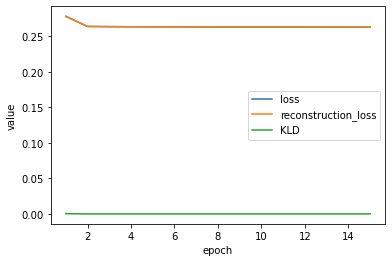

In [12]:
plt.figure()
plt.plot(range(1,epochs+1), loss_list, label = 'loss')
plt.plot(range(1,epochs+1), reconstruction_loss_list, label = 'reconstruction_loss')
plt.plot(range(1,epochs+1), KLD_list, label = 'KLD')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

# Visuallization

You can input a integer in the *text box*, or drag the *slider bar*, and the value will be the index for the sample which will be shown with title "orignal image", and the corresponding reconstructed image will also be shwon.  

You might see some images are not reconstructed well.

In [13]:
selected_dataset = train_dataset # select the dataset to visualize, values: train_dataset, test_dataset

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def plot_x(i):
    model.eval()
    with torch.no_grad():
        x=selected_dataset[i][0]
        x = x.view(-1, x_dim)
        x = x.to(DEVICE)
        
        x_hat, _, _ = model(x)

        fig = plt.figure(figsize=(8,8))
        plt.subplot(1,2,1)
        plt.title('Original image')
        plt.imshow(x.view(28,28).cpu().numpy())
        plt.subplot(1,2,2)
        plt.title('reconstructed image')
        plt.imshow(x_hat[0].view(28,28).cpu().numpy())
        # plt.imshow(x_hat[0].view(28,28).cpu().numpy(), cmap="gray")
        plt.show()

widget_a = widgets.BoundedIntText(value=1, min=0, max=len(selected_dataset)-1, step=1)
widget_b = widgets.IntSlider(value=1, min=0, max=len(selected_dataset)-1, step=1)
mylink = widgets.jslink((widget_a, 'value'), (widget_b, 'value'))

display(widget_a)
interact(plot_x, i = widget_b)

BoundedIntText(value=1, max=59999)

interactive(children=(IntSlider(value=1, description='i', max=59999), Output()), _dom_classes=('widget-interac…

<function __main__.plot_x(i)>

Generate samples by randomly sampling $z$ values from $p_{\R{Z}}$

In [14]:
model.eval()

with torch.no_grad():
    noise = torch.randn(batch_size, latent_dim).to(DEVICE)
    generated_images = decoder(noise)

save_image(generated_images.view(-1, 1, 28, 28), 'generated_samples.png')

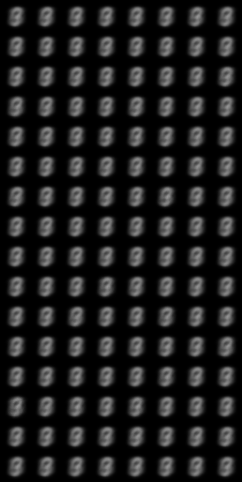

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename =r"./generated_samples.png")

You can view the single generated image by changing the value of the argument *idx*.  

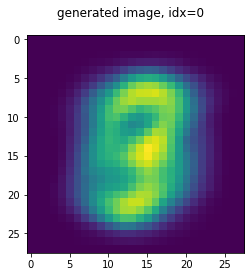

In [16]:
def show_image(x, idx, title=None):
    x = x.view(batch_size, 28, 28)

    fig = plt.figure()
    if title is not None:
        plt.suptitle(title + ', idx=' + str(idx))
    plt.imshow(x[idx].cpu().numpy())

show_image(generated_images, idx=0, title='generated image')

---
**Exercise** 

What is the relationship between the divergence term in $L_{\text{VAE}}$ and $I(\hat{\R{Z}} \wedge \R{X})$?  

What will happen if the model is sufficiently flexible and the $L_{\text{VAE}}$ achieves optimal value?


Try use stronger *Encoder* and *Decoder*.

# Balancing the two terms in $L_{\text{VAE}}$

Define the loss $L_{\beta}$
$$L_{\beta} := E[ - p_{\hat{\R{X}}|\R{Z}}(\R{X}|\hat{\R{Z}})] + \beta D(P_{\hat{\R{Z}}|\R{X}} || P_{\R{Z}}|P_{\R{X}}).$$

# Distanglement of latent representation in $\beta$-VAE

Define a uniform random variable $\R{J}$ on $\{1,2,\dots, N\}$ which relates to the samples in the dataset. Then $x_{\R{J}}$ is a random variable.  
Define
$$ p_{\hat{\R{Z}}|x_{\R{J}}} (\cdot|x_j) := p_{\hat{\R{Z}}|\R{J}}(\cdot|j). $$
Then we have
\begin{align*}
    p_{\R{J}}(j) &= \frac{1}{N}, \\
    p_{\hat{\R{Z}}, \R{J}}(\cdot|j) &= p_{\hat{\R{Z}} | \R{J}}(\cdot|j) p_{\R{J}}(j) = \frac{1}{N}p_{\hat{\R{Z}} | \R{J}}(\cdot|j) 
\end{align*} 

Then 
\begin{align*}
D(P_{\hat{\R{Z}}|\R{X}} || P_{\R{Z}}|P_{\R{X}}) &= E \left[ D(P_{\hat{\R{Z}}|\R{X}})(\cdot|\R{X}) || P_{\R{Z}} \right] \\
&= E \left[ D(P_{\hat{\R{Z}}|\R{J}})(\cdot|\R{J}) || P_{\R{Z}} \right] \\
&= \underbrace{D \left( P_{\hat{\R{Z}} \R{J}} || P_{\hat{\R{Z}}} P_{\R{J}} \right)}_{\text{Index-Code MI}} 
+ \underbrace{D \left( P_{\hat{\R{Z}}}|| \prod_{k=1}^{d_{\R{Z}}} P_{\R{z}_k} \right)}_{\text{Total Correlation}} 
+ \underbrace{ \sum_{k=1}^{d_{\R{Z}}} D \left( P_{\hat{\R{z}}_k} || P_{\R{z}_k} \right)}_{\text{Dimension-wise divergence}}.
\end{align*}  
For details, read [Isolating Sources of Disentanglement in VAEs](https://arxiv.org/abs/1802.04942).

# InfoVAE

Two problems of $L_{\text{VAE}}$:
- When model capacity is limited, there is a tradoff between the two terms in $L_{\text{VAE}}$, and the variational posterior $p_{\hat{\R{Z}}|\R{X}}$ may be quit inaccurate.  
    - The reconstruction term can encorage choosing $p_{\hat{\R{Z}}|\R{X}}(\cdot|x_i)$ and $p_{\hat{\R{Z}}|\R{X}}(\cdot|x_j)$ to choose disjoint support when $x_i \not= x_j$. The divergence term in $L_{\text{VAE}}$ may not always sufficient to prevent this.

- When model capacity is sufficiently large, $I(\hat{\R{Z}} \wedge \R{X})$ tends to be vanishingly small, and $\hat{\R{X}}$ tend to be independent of $\R{Z}$.

$$L_{\text{VAE}} = D(P_{X|\hat{Z}} || P_{\hat{X}|Z}) + D(P_{\hat{Z}} || P_{Z}) + \underbrace{H(\R{X})}_{\text{constant}}$$

Solution: add a term in the loss to encourage the MI between $\hat{\R{Z}}$ and $\R{X}$.

The infoVAE loss:
$$
\begin{align}
L_{InfoVAE} &= D(P_{\R{X}|\hat{\R{Z}}} || P_{\hat{\R{X}}|\R{Z}}|P_{\hat{\R{Z}}}) + \gamma D(P_{\hat{\R{Z}}}||P_{\R{Z}}) - \alpha I(\hat{\R{Z}} \wedge \R{X}) \\
&= E[\log p_{\R{X}|\hat{\R{Z}}}(\R{X}|\hat{\R{Z}})] + E[- \log p_{\hat{\R{X}}|\R{Z}}(\R{X}|\hat{\R{Z}})] + \gamma E[\log p_{\hat{\R{Z}}}(\hat{\R{Z}})]- \gamma E [\log p_{\R{Z}}(\hat{\R{Z}})]  - \alpha E[\log p_{\hat{\R{Z}}|\R{X}}(\hat{\R{Z}}|\R{X})] + \alpha E[\log_{\hat{\R{Z}}}(\hat{\R{Z}})]  \\
&= E[\log p_{\hat{\R{Z}}|\R{X}}(\hat{\R{Z}}|\R{X})] + E[\log p_{\R{X}}(\R{X})] - E[p_{\hat{\R{Z}}}(\hat{\R{Z}})] + E[- \log p_{\hat{\R{X}}|\R{Z}}(\R{X}|\hat{\R{Z}})] + \gamma E[\log p_{\hat{\R{Z}}}(\hat{\R{Z}})]- \gamma E [\log p_{\R{Z}}(\hat{\R{Z}})]  - \alpha E[\log p_{\hat{\R{Z}}|\R{X}}(\hat{\R{Z}}|\R{X})] + \alpha E[\log_{\hat{\R{Z}}}(\hat{\R{Z}})]  \\
&= E[- \log p_{\hat{\R{X}}|\R{Z}}(\R{X}|\hat{\R{Z}})] + (1-\alpha)E[\log p_{\hat{\R{Z}}|\R{X}}(\hat{\R{Z}}|\R{X})] +  (\alpha + \gamma -1)E[p_{\hat{\R{Z}}}(\hat{\R{Z}})] - \gamma E [\log p_{\R{Z}}(\hat{\R{Z}})] + E[\log p_{\R{X}}(\R{X})] \\
&= E[- \log p_{\hat{\R{X}}|\R{Z}}(\R{X}|\hat{\R{Z}})] +  (1-\alpha)D(P_{\hat{\R{Z}}|\R{X}}||P_{\R{Z}}| P_{\R{X}}) + (\alpha + \gamma -1)D(P_{\hat{\R{Z}}}||P_{\R{Z}}) - \underbrace{H(\R{X})}_{\text{constant}}.
\end{align}
$$

refer to the implementation by https://github.com/pratikm141/MMD-Variational-Autoencoder-Pytorch-InfoVAE